In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("../DataSets/winequality.csv", names=['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'residual sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality'],skiprows=1,sep=r'\s*;\s*', engine='python')

In [5]:
df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,residual sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [13]:
x = df.drop('Quality', axis=1)
y = df['Quality']

In [16]:
# subtract every element with its mean and divide by stddev, using preprocessing.scale

In [12]:
from sklearn import preprocessing

In [15]:
x = preprocessing.scale(x)

In [8]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
# we only use x variables, unsupervised learning

In [23]:
# classify using SVM

In [18]:
from sklearn.svm import LinearSVC

In [19]:
svm = LinearSVC(penalty='l1', dual=False, tol=1e-3)

In [20]:
svm.fit(x_train,y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [21]:
accuracy = svm.score(x_test,y_test)

In [22]:
accuracy

0.49183673469387756

In [25]:
#reducing dimensionality should improve accuracy, dimensionality redutcion helps only if features are correlated

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
corrmat = df.corr()

f,ax = plt.subplots(figsize=(7,7))

In [28]:
sns.set(font_scale=0.9)

<Axes: >

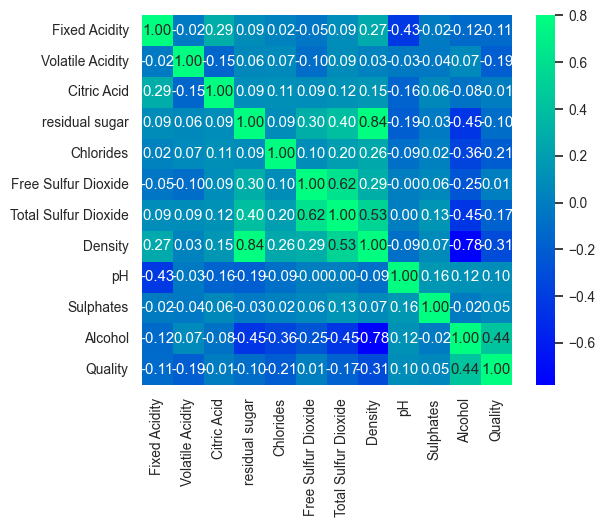

In [29]:
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f',cmap='winter')

In [30]:
# we see features are correlated, so dimensionality reduction should help

In [31]:
from sklearn.decomposition import PCA

In [70]:
# 11 features, so 11 dimentions initially, but reduce to 9, based on variance ratio below, experiment with multiple dimensions
pca = PCA(n_components=9,whiten=True)

In [64]:
x_reduced = pca.fit_transform(x)

In [ ]:
#variance across all dimensions

In [35]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824, 0.28954625,
       0.0206533 ])

In [38]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942, 0.02631701,
       0.00187719])

Text(0, 0.5, 'Variance Ratio')

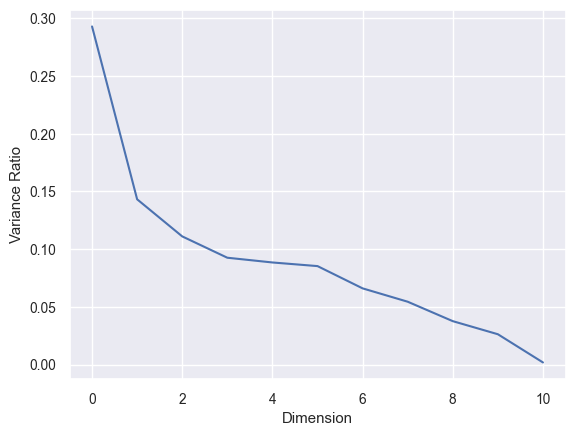

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Variance Ratio')

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_reduced, y, test_size=0.2,random_state=0)

In [66]:
svm_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)

In [67]:
svm_pca.fit(x_train,y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [68]:
svm_pca.score(x_test,y_test)

0.44081632653061226